# **K-Nearest Neighbors**

In this exercise, you will build a classifier using the K-Nearest Neighbors algorithm.

---

### **1. Generating data**

You will start by generating synthetic data for this problem.  

- Generate a dataset with **n = 50 points** in a unit square. Each point should have an assigned label: orange or blue.  
  - Think about the rules to assign the labels (hint: you need a boundary rule to classify points as orange or blue).  
  - Store the x and y coordinates, along with the label, in a structured format.  
  - Vizualize the dataset.

---

### **2. The algorithm**

You will now use your generated dataset to determine the label of a new observation **(x₀, y₀)**. Here are the steps you should follow :

- Compute the distances between **(x₀, y₀)** and all points in your dataset.  
  - How will you calculate the distance ? 
  - What type of distance metric can you use ?  

- Select a value for **K**

- Identify the **K nearest neighbors** for your new point based on the distances you computed.  

- Based on the labels of the nearest neighbors, how would you decide the predicted class for the new observation ? Do it and explain your approach.

- Experiment with different values of **K** :  
  - Analyze how the prediction changes depending on different values for **K**.  
  - What happens when **K** is too small ? Too large ?

---

### **3. More complex dataset**

- Implement the K-Nearest Neighbors algorithm for datasets with more complicated shapes (generate these data, you can use your creativity).  
  - What happens to your prediction as the dataset structure becomes more complex ?

- Test your implementation by generating a random test set with new points. Measure how well your algorithm performs (e.g., accuracy, precision, recall).  

- Try using a different distance metric (e.g., Manhattan distance) to see how it impacts classification. Which metric feels more appropriate for your specific problem ?

---



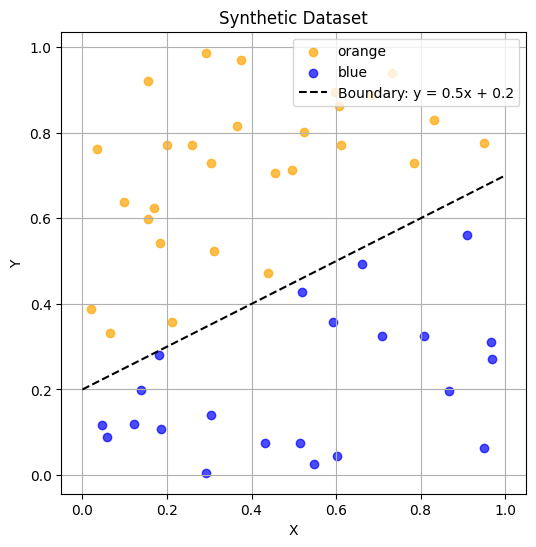

In [2]:
# 1. Generating data

import numpy as np
import matplotlib.pyplot as plt 

n = 50
np.random.seed(42)
x = np.random.rand(n)
y = np.random.rand(n)

# Boundary rule: y >= 0.5*x + 0.2 - 'orange', remainings are 'blue'

labels = []

for i in range(n):
    if y[i] >= (0.5*x[i] + 0.2):
        labels.append('orange')
    else:
        labels.append('blue')

data = {'x': x, 'y': y, 'label': labels}

orange_points_place = []
blue_points_place = []

for i in range(n):
    if labels[i] == 'orange':
        orange_points_place.append(i)
    if labels[i] == 'blue':
        blue_points_place.append(i)

orange_points_x = []
blue_points_x = []

for k in range(len(orange_points_place)):
    orange_points_x.append(x[orange_points_place[k]])

for k in range(len(blue_points_place)):
    blue_points_x.append(x[blue_points_place[k]])


orange_points_y = []
blue_points_y = []

for j in range(len(orange_points_place)):
    orange_points_y.append(y[orange_points_place[j]])

for j in range(len(blue_points_place)):
    blue_points_y.append(y[blue_points_place[j]])

plt.figure(figsize=(6,6))
plt.scatter(x=orange_points_x, y=orange_points_y, color='orange', label='orange', alpha=0.7)
plt.scatter(x=blue_points_x, y=blue_points_y, color='blue', label = 'blue', alpha=0.7)


x_line = np.linspace(0, 1, 100)  
y_line = 0.5 * x_line + 0.2     
plt.plot(x_line, y_line, color='black', linestyle='--', label='Boundary: y = 0.5x + 0.2')


plt.title('Synthetic Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

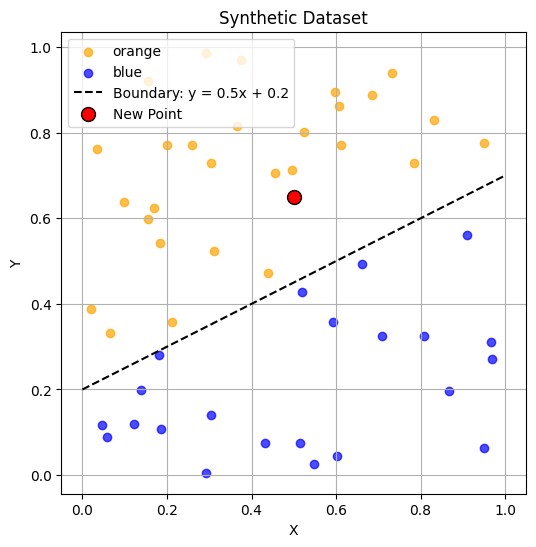

orange count : 13 blue_count : 2


In [3]:
# 2. The algorithm

# point (x0, y0)

x_0 = 0.5
y_0 = 0.65

plt.figure(figsize=(6,6))
plt.scatter(x=orange_points_x, y=orange_points_y, color='orange', label='orange', alpha=0.7)
plt.scatter(x=blue_points_x, y=blue_points_y, color='blue', label = 'blue', alpha=0.7)
plt.plot(x_line, y_line, color='black', linestyle='--', label='Boundary: y = 0.5x + 0.2')
plt.scatter(x_0, y_0, color='red', label='New Point', s=100, edgecolors='black')
plt.title('Synthetic Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# calculating distances between (x0, y0) and all points in the dataset

distances = np.sqrt((x - x_0)**2 + (y - y_0) ** 2)

# select k 

k = 15

# identifying k nearest neighbors to the (x_0, y_0) point

neighbors_ind = np.argsort(distances)[:k]
neighbors_labels = [labels[i] for i in neighbors_ind]

orange_count = sum(1 for label in neighbors_labels if label == 'orange')
blue_count = sum(1 for label in neighbors_labels if label == 'blue')
print("orange count : " + str(orange_count) + " blue_count : " + str(blue_count))

# orange_count > blue_count, so (x_0, y_0) is predicted as "orange"


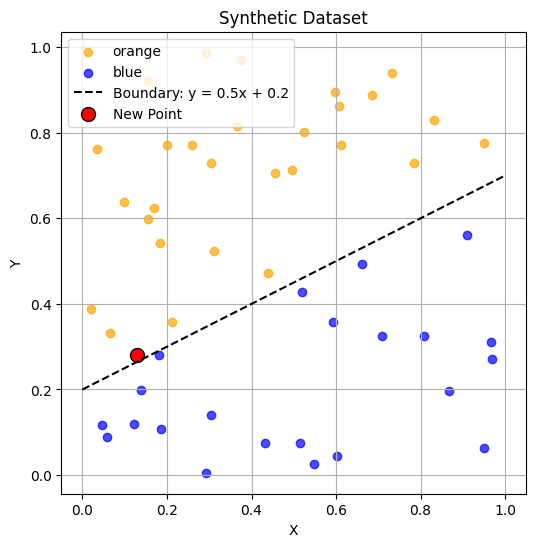

K=3 orange count : 1 blue_count : 2
K=40 orange count : 22 blue_count : 18


In [4]:
# point (x0, y0)

x_0 = 0.13
y_0 = 0.28

plt.figure(figsize=(6,6))
plt.scatter(x=orange_points_x, y=orange_points_y, color='orange', label='orange', alpha=0.7)
plt.scatter(x=blue_points_x, y=blue_points_y, color='blue', label = 'blue', alpha=0.7)
plt.plot(x_line, y_line, color='black', linestyle='--', label='Boundary: y = 0.5x + 0.2')
plt.scatter(x_0, y_0, color='red', label='New Point', s=100, edgecolors='black')
plt.title('Synthetic Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


distances = np.sqrt((x - x_0)**2 + (y - y_0) ** 2)


k_small = 3
k_large = 40

neighbors_k_small = np.argsort(distances)[:k_small]
neighbors_labels_k_small = [labels[i] for i in neighbors_k_small]

neighbors_k_large = np.argsort(distances)[:k_large]
neighbors_labels_k_large = [labels[i] for i in neighbors_k_large]

orange_count_k_small = sum(1 for label in neighbors_labels_k_small if label == 'orange')
blue_count_k_small = sum(1 for label in neighbors_labels_k_small if label == 'blue')

orange_count_k_large = sum(1 for label in neighbors_labels_k_large if label == 'orange')
blue_count_k_large = sum(1 for label in neighbors_labels_k_large if label == 'blue')

print("K="+ str(k_small) + " orange count : " + str(orange_count_k_small) + " blue_count : " + str(blue_count_k_small))
print("K=" + str(k_large) + " orange count : " + str(orange_count_k_large) + " blue_count : " + str(blue_count_k_large))


Too small k may overfit the data

Too large k may underfit the data

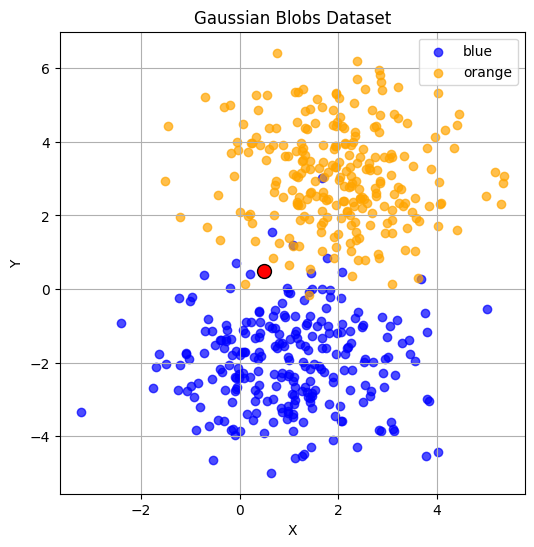

k = 5 -> orange count: 3, blue count: 2
Predicted class for (0.5, 0.5): orange

k = 10 -> orange count: 5, blue count: 5
Predicted class for (0.5, 0.5): blue

k = 30 -> orange count: 11, blue count: 19
Predicted class for (0.5, 0.5): blue

k = 50 -> orange count: 18, blue count: 32
Predicted class for (0.5, 0.5): blue



In [8]:
# Generate more complex data (Gaussian Blobs)
from sklearn.datasets import make_blobs

np.random.seed(42)
x_complex, y_complex = make_blobs(n_samples=500, centers=[(1, -2), (2, 3)], cluster_std=1.3)

blue_points = x_complex[y_complex == 0]
orange_points = x_complex[y_complex == 1]

plt.figure(figsize=(6,6))
plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.7, label='blue')
plt.scatter(orange_points[:, 0], orange_points[:, 1], color='orange', alpha=0.7, label='orange')
plt.title('Gaussian Blobs Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)


def knn_classification(x_data, y_data, test_point, k):
    distances = np.sqrt((x_data[:, 0] - test_point[0])**2 + (x_data[:, 1] - test_point[1])**2)
    neighbors_ind = np.argsort(distances)[:k]
    neighbors_labels = [y_data[i] for i in neighbors_ind]
    orange_count = sum(1 for label in neighbors_labels if label == 1)
    blue_count = sum(1 for label in neighbors_labels if label == 0)
    prediction = 'orange' if orange_count > blue_count else 'blue'
    print(f"k = {k} -> orange count: {orange_count}, blue count: {blue_count}")
    print(f"Predicted class for {test_point}: {prediction}\n")


test_point = (0.5, 0.5)
plt.scatter(test_point[0], test_point[1], color='red', label='New Point', s=100, edgecolors='black')
plt.show()

for k in [5, 10, 30, 50]:
    knn_classification(x_complex, y_complex, test_point, k)


In [ ]:
# Generating a Test Set

from sklearn.metrics import accuracy_score, precision_score, recall_score

np.random.seed(50)
x_test, y_test = make_blobs(n_samples=100, centers=[(1, -2), (2, 3)], cluster_std=1.3)

# modified function to return predictions array
def knn_classification(x_data, y_data, test_points, k, distance_metric):
    predictions = []
    for test_point in test_points:
        if distance_metric == 'manhattan':
            distances = np.abs(x_data[:, 0] - test_point[0]) + np.abs(x_data[:, 1] - test_point[1])
        elif distance_metric == 'euclidean':
            distances = np.sqrt((x_data[:, 0] - test_point[0])**2 + (x_data[:, 1] - test_point[1])**2)
        else:
            raise ValueError("Unsupported distance metric. Choose 'manhattan' or 'euclidean'.")
        
        neighbors_ind = np.argsort(distances)[:k]
        neighbors_labels = [y_data[i] for i in neighbors_ind]
        orange_count = sum(1 for label in neighbors_labels if label == 1)
        blue_count = sum(1 for label in neighbors_labels if label == 0)
        prediction = 1 if orange_count > blue_count else 0
        predictions.append(prediction)
    
    return np.array(predictions)
        

for k in [5, 10, 30, 50]:
    y_pred = knn_classification(x_complex, y_complex, x_test, k, 'euclidean')
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"k = {k}")
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}\n")


k = 5
Accuracy: 0.9800, Precision: 1.0000, Recall: 0.9600

k = 10
Accuracy: 0.9900, Precision: 1.0000, Recall: 0.9800

k = 30
Accuracy: 0.9900, Precision: 1.0000, Recall: 0.9800

k = 50
Accuracy: 0.9800, Precision: 1.0000, Recall: 0.9600



In [10]:
# manhattan distance

np.random.seed(42)
x_train, y_train = make_blobs(n_samples=500, centers=[(1, -2), (2, 3)], cluster_std=1.3)


np.random.seed(50)  
x_test, y_test = make_blobs(n_samples=100, centers=[(1, -2), (2, 3)], cluster_std=1.3)

for k in [5, 10, 30, 50]:
    y_pred = knn_classification(x_train, y_train, x_test, k, "manhattan")
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"k = {k}")
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}\n")


k = 5
Accuracy: 0.9800, Precision: 1.0000, Recall: 0.9600

k = 10
Accuracy: 0.9900, Precision: 1.0000, Recall: 0.9800

k = 30
Accuracy: 0.9900, Precision: 1.0000, Recall: 0.9800

k = 50
Accuracy: 0.9800, Precision: 1.0000, Recall: 0.9600




---

# **Support Vector Machine**

A dataset contains two classes: Class A ($y=+1$ ) and Class B ($y=-1$). Your goal is to:

You are given six labeled data points in a 2D space:

| Point $ x_i $     | Label $ y_i $  |
|-------------------|---------------|
| $ x_1 = [2, 3] $   | $ +1 $         |
| $ x_2 = [1, 2] $   | $ +1 $         |
| $ x_3 = [3, 1] $   | $ +1 $         |
| $ x_4 = [1, 0] $   | $ -1 $         |
| $ x_5 = [2, -1] $  | $ -1 $         |
| $ x_6 = [0, 0] $   | $ -1 $         |

---

### **1. Sketch & intuition**
- **1.1:** Plot the six points on a 2D graph with $ x_1 $ -$ x_2 $  axes. Do the two classes form distinct clusters ?
- **1.2:** What does it mean for the two classes to be linearly separable ? What would this imply about the complexity of the classification problem ?
- **1.3:** Are the two classes linearly separable ? If yes, arbitrarily sketch a decision boundary (no need to optimize it yet).
- **1.4:** What is the margin in the context of a decision boundary?
- **1.5:** Why would we like to maximize the margin ? What might happen if the margin is very small ? (think about new observations and future predictions)
---


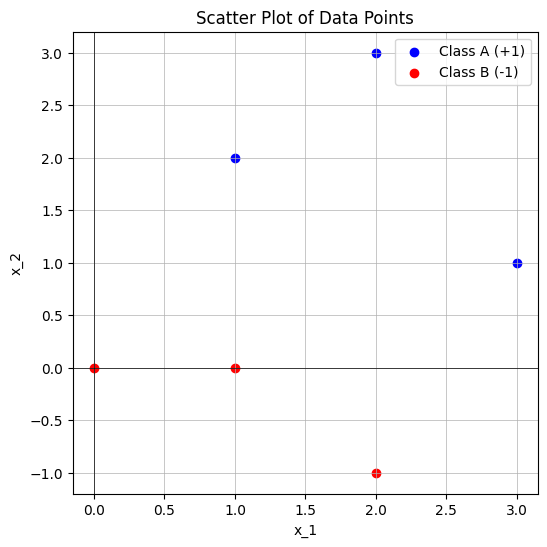

In [ ]:
# 1.1 Plotting data

class_A = [(2, 3), (1, 2), (3, 1)]
class_B = [(1, 0), (2, -1), (0, 0)]


x_A, y_A = zip(*class_A)
x_B, y_B = zip(*class_B)


plt.figure(figsize=(6, 6))
plt.scatter(x_A, y_A, color='blue', label='Class A (+1)', marker='o')
plt.scatter(x_B, y_B, color='red', label='Class B (-1)', marker='o')


plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Scatter Plot of Data Points')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linewidth=0.5)
plt.legend()
plt.show()


#1.2 

If two classes are linearly separable, it means that there exists a linear equation defining a hyperplane that perfectly separates all points of one class from the other.

If two classes are linearly separable, it means that the classification problem is relatively simple and can be solved using basic linear classification methods.

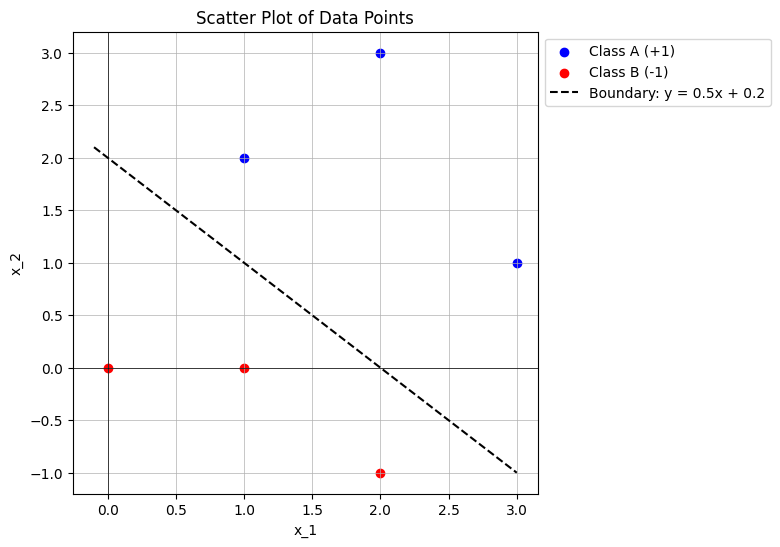

In [ ]:
# 1.3 arbitrarily sketching a decision boundary  
x_line = np.linspace(-0.1, 3.0, 100)  
y_line = (-1) * x_line + 2  

plt.figure(figsize=(6, 6))
plt.scatter(x_A, y_A, color='blue', label='Class A (+1)', marker='o')
plt.scatter(x_B, y_B, color='red', label='Class B (-1)', marker='o')
plt.plot(x_line, y_line, color='black', linestyle='--', label='Boundary: y = 0.5x + 0.2')

plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Scatter Plot of Data Points')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linewidth=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


#1.4

The margin in the context of a decision boundary is the shortest distance between the decision boundary and the closest data points from either class (support vectors).


#1.5

Maximizing the margin helps improve the model's ability to generalize to new data. A larger margin makes the classifier more robust, meaning it is less sensetive to small variations or noise in the data. If the margin is very small, the decision boundary is too close to the edge points, leading to overfitting. This means the model memorizes training data instead of learning general patterns, resulting in poor performance on new observations. As a resultm future presictions may become unstable and misclassifications will increase.



---

### **2. Decision Boundary for Hard-Margin**
The decision boundary for an SVM is represented as:

$$
x^T \beta + \beta_0 = 0, \quad \text{where } \beta = [\beta_1, \beta_2]^T \text{are some weights}, \text{ and } \beta_0 \text{ is the intercept.}
$$

- **2.1:** Write down the margin constraints:

$$
y_i (\beta^T x_i + \beta_0) \geq 1
$$

For each observation ($ x_1, x_2, ..., x_6 $ ), substitute $x_i$  and $y_i$  into the inequality.

- **2.2** What does the margin constraint enforce for a correctly classified point ? Explain what this constraint means for points with $y_i=+1$ and $y_i=−1$.

- **2.3** Lets say our solver choose random initial values to specify a decision boundary:
    - $\beta = [1, -1]^T$ 
    - $\beta_0 = 0$

Verify step by step, whether the margin constraint is satisfied for each observation ($x_1, x_2, \ldots, x_6$ ) given their respective labels ($y_1, y_2, \ldots, y_6$ ). Sketch the decision line.

- **2.4** At the second iteration, our solver updates the parameters : $\beta = [2, 2]^T$ & $\beta_0 = -4$. Check again the conditions for each observations and draw the line. Does the margin look to be maximized here ? Compute its lenght :  $$M = \frac{1}{||\beta||}$$,
where $ ||\beta|| = \sqrt{\beta_1^2 + \beta_2^2} $ .



- **2.5: Using sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), write a code to find the decision line that maximize the margin. What are the estimated parameters ? Plot the line.**
    (Hint : use the linear kernel parameter)


#2.1
\[
\begin{aligned}
& 2\beta_1 + 3\beta_2 + \beta_0 \geq 1 \\
& 1\beta_1 + 2\beta_2 + \beta_0 \geq 1 \\
& 3\beta_1 + 1\beta_2 + \beta_0 \geq 1 \\
& 1\beta_1 + 0\beta_2 + \beta_0 \leq -1 \\
& 2\beta_1 - 1\beta_2 + \beta_0 \leq -1 \\
& \beta_0 \leq -1
\end{aligned}
\]

#2.2
For a correctly classified point margin constraint enforces to be on one side (positive class and be classified as y = +1)

For negative class, the margin constraint enforces to be on the other side of the decision boundary and be classified as y = -1

Any other points that do not satisfy this constraint violate the margin.

In [12]:
data_points = np.array([[2, 3], [1, 2], [3, 1], [1, 0], [2, -1], [0, 0]])
labels = np.array([1, 1, 1, -1, -1, -1])

x1 = [2 3], y1 = 1, f(x1) = -1, margin = -1 - misclassified
x2 = [1 2], y2 = 1, f(x2) = -1, margin = -1 - misclassified
x3 = [3 1], y3 = 1, f(x3) = 2, margin = 2 - correct
x4 = [1 0], y4 = -1, f(x4) = 1, margin = -1 - misclassified
x5 = [ 2 -1], y5 = -1, f(x5) = 3, margin = -3 - misclassified
x6 = [0 0], y6 = -1, f(x6) = 0, margin = 0 - misclassified


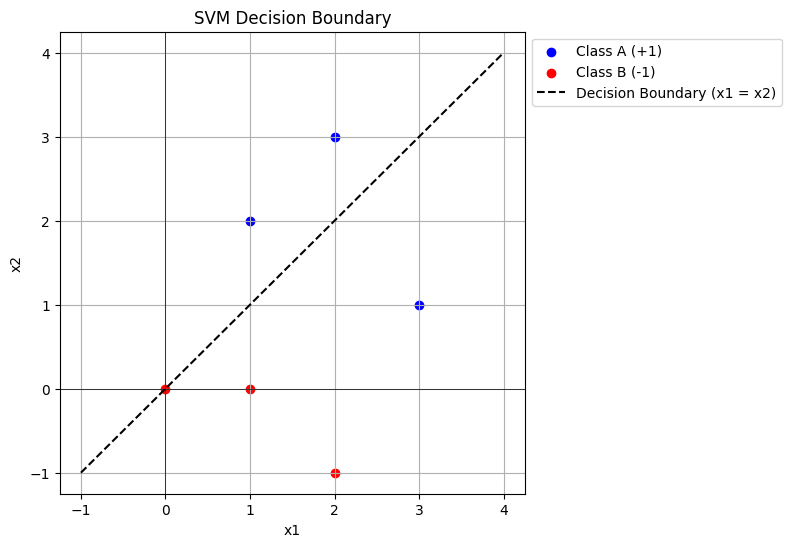

In [13]:
#2.3

beta = np.array([1, -1])
beta_0 = 0

computed_values = np.dot(data_points, beta) + beta_0
margin_constraints = labels * computed_values

results = list(zip(data_points, labels, computed_values, margin_constraints))
for i, (point, label, value, constraint) in enumerate(results, 1):
    status = "correct" if constraint >= 1 else "misclassified"
    print(f"x{i} = {point}, y{i} = {label}, f(x{i}) = {value}, margin = {constraint} - {status}")

plt.figure(figsize=(6, 6))
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)


class_A = data_points[labels == 1] 
class_B = data_points[labels == -1]  

x_A, y_A = class_A[:, 0], class_A[:, 1]
x_B, y_B = class_B[:, 0], class_B[:, 1]

plt.scatter(x_A, y_A, color='blue', label='Class A (+1)', marker='o')
plt.scatter(x_B, y_B, color='red', label='Class B (-1)', marker='o')

# Decision boundary: x1 - x2 = 0 -> x1 = x2
x_vals = np.linspace(-1, 4, 100)
y_vals = x_vals  
plt.plot(x_vals, y_vals, '--k', label="Decision Boundary (x1 = x2)")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("SVM Decision Boundary")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


x1 = [2 3], y1 = 1, f(x1) = 6, margin = 6 - correct
x2 = [1 2], y2 = 1, f(x2) = 2, margin = 2 - correct
x3 = [3 1], y3 = 1, f(x3) = 4, margin = 4 - correct
x4 = [1 0], y4 = -1, f(x4) = -2, margin = 2 - correct
x5 = [ 2 -1], y5 = -1, f(x5) = -2, margin = 2 - correct
x6 = [0 0], y6 = -1, f(x6) = -4, margin = 4 - correct


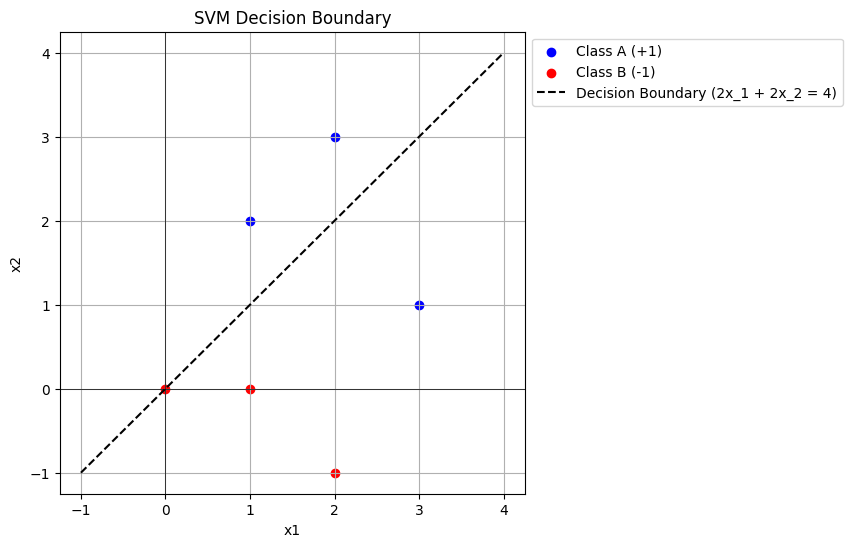

Margin length: 0.35


In [14]:
#2.4

beta = np.array([2, 2])  
beta_0 = -4  

computed_values = np.dot(data_points, beta) + beta_0
margin_constraints = labels * computed_values

results = list(zip(data_points, labels, computed_values, margin_constraints))
for i, (point, label, value, constraint) in enumerate(results, 1):
    status = "correct" if constraint >= 1 else "misclassified"
    print(f"x{i} = {point}, y{i} = {label}, f(x{i}) = {value}, margin = {constraint} - {status}")

plt.figure(figsize=(6, 6))
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)


plt.scatter(x_A, y_A, color='blue', label='Class A (+1)', marker='o')
plt.scatter(x_B, y_B, color='red', label='Class B (-1)', marker='o')
plt.plot(x_vals, y_vals, '--k', label="Decision Boundary (2x_1 + 2x_2 = 4)")

# Decision boundary: 2x_1 + 2x_2 - 4 = 0 ->  x_2 = 2 - x_1

x_vals = np.linspace(-1, 4, 100)
y_vals = 2 - x_vals

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("SVM Decision Boundary")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

norm_beta = np.linalg.norm(beta)  
margin_length = 1 / norm_beta  
print(f"Margin length: {margin_length:.2f}")

beta = [0.49984 0.99968], beta_0 = -1.50


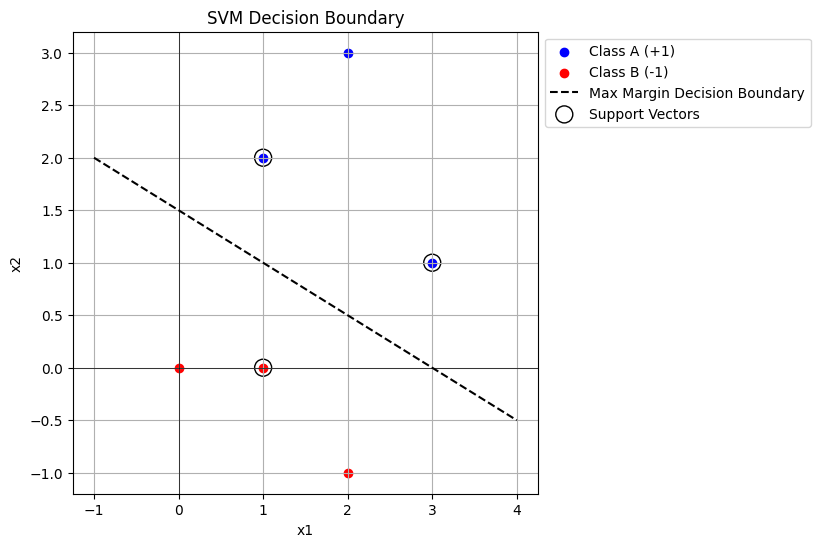

Margin length: 0.89


In [15]:
#2.5 

from sklearn.svm import SVC


data_points = np.array([[2, 3], [1, 2], [3, 1], [1, 0], [2, -1], [0, 0]])
labels = np.array([1, 1, 1, -1, -1, -1])

model = SVC(kernel='linear')
model.fit(data_points, labels)

beta = model.coef_[0]
beta_0 = model.intercept_[0]
print(f"beta = {beta}, beta_0 = {beta_0:.2f}")


# Decision boundary

x_vals = np.linspace(-1, 4, 100)
y_vals = (-beta[0] * x_vals - beta_0) / beta[1]

support_vectors = model.support_vectors_

plt.figure(figsize=(6, 6))
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.scatter(x_A, y_A, color='blue', label='Class A (+1)', marker='o')
plt.scatter(x_B, y_B, color='red', label='Class B (-1)', marker='o')
plt.plot(x_vals, y_vals, '--k', label="Max Margin Decision Boundary")

plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=150, facecolors='none', edgecolors='k', label="Support Vectors")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("SVM Decision Boundary")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


norm_beta = np.linalg.norm(beta)  
margin_length = 1 / norm_beta  
print(f"Margin length: {margin_length:.2f}")


---

### **3. Slack Variables for a Soft-Margin**
In real-world datasets, perfect separation might not be possible as the data might be mixed. 

Lets add two new observations : 
- $ x_7 = [1, 3] $  with $y_7 = -1 $
- $ x_8 = [3, -2] $  with $y_8 = +1 $


Slack variables ($ \xi_i $ ) can be added to relax the SVM constraint for incorrectly classified or margin-violating points:

$$

y_i (\beta^T x_i + \beta_0) \geq 1 - \xi_i, \quad \xi_i \geq 0

$$


They are computed by the Hinge Loss function:

$$
\xi_i = \max(0, 1 - y_i (\beta^T x_i + \beta_0))
$$

- **3.1: Check for each observation if the point violates the soft-margin constraint. Compute the slack variable $ \xi_i $  for each point.**


- **3.2: What is the slack variable when the observation is well classified ?**

- **3.3: Identify the points that violate the margin.**

- **3.3: Compute the total violation:**

$$

\text{Total Slack:} \quad \sum_{i=1}^n \xi_i.

$$

x1 = [2 3], y1 = 1, f(x1) = 2.50, E1 = 0.00000 - correct
x2 = [1 2], y2 = 1, f(x2) = 1.00, E2 = 0.00021 - correct
x3 = [3 1], y3 = 1, f(x3) = 1.00, E3 = 0.00021 - correct
x4 = [1 0], y4 = -1, f(x4) = -1.00, E4 = 0.00043 - correct
x5 = [ 2 -1], y5 = -1, f(x5) = -1.50, E5 = 0.00000 - correct
x6 = [0 0], y6 = -1, f(x6) = -1.50, E6 = 0.00000 - correct
x7 = [1 3], y7 = -1, f(x7) = 2.00, E7 = 2.99947 - misclassified
x8 = [ 3 -2], y8 = 1, f(x8) = -2.00, E8 = 2.99925 - misclassified


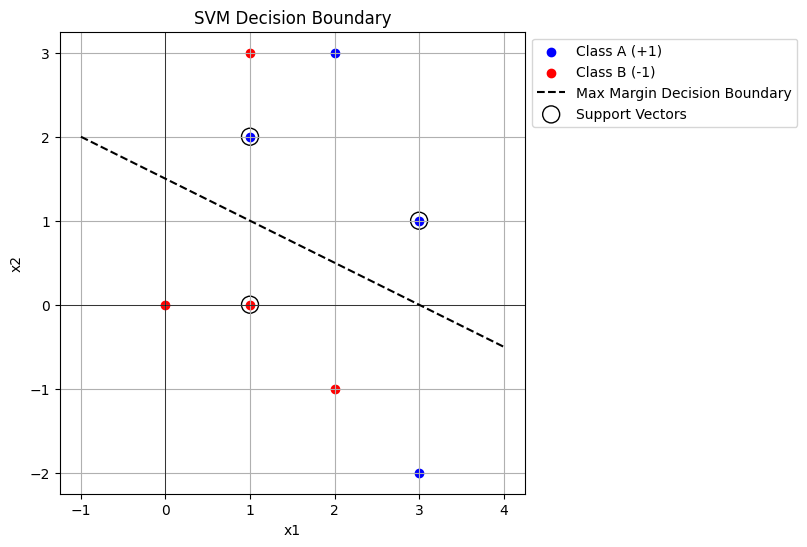

Total Slack: 5.99957


In [16]:
data_points = np.array([[2, 3], [1, 2], [3, 1], [1, 0], [2, -1], [0, 0], [1,3], [3, -2]])
labels = np.array([1, 1, 1, -1, -1, -1, -1, 1])


beta = model.coef_[0]
beta_0 = model.intercept_[0]

computed_values = np.dot(data_points, beta) + beta_0

# Compute slack variables

slack_variables = np.maximum(0, 1 - labels * computed_values)


for i, (point, label, value, slack) in enumerate(zip(data_points, labels, computed_values, slack_variables), 1):
    correctly_classified = label * value >= 0
    status = "correct" if correctly_classified else "misclassified"
    print(f"x{i} = {point}, y{i} = {label}, f(x{i}) = {value:.2f}, E{i} = {slack:.5f} - {status}")



plt.figure(figsize=(6, 6))
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)


class_A = data_points[labels == 1] 
class_B = data_points[labels == -1]  

x_A, y_A = class_A[:, 0], class_A[:, 1]
x_B, y_B = class_B[:, 0], class_B[:, 1]

plt.scatter(x_A, y_A, color='blue', label='Class A (+1)', marker='o')
plt.scatter(x_B, y_B, color='red', label='Class B (-1)', marker='o')

x_vals = np.linspace(-1, 4, 100)
y_vals = (-beta[0] * x_vals - beta_0) / beta[1] 
plt.plot(x_vals, y_vals, '--k', label="Max Margin Decision Boundary")

plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=150, facecolors='none', edgecolors='k', label="Support Vectors")


plt.xlabel("x1")
plt.ylabel("x2")
plt.title("SVM Decision Boundary")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

total_slack = np.sum(slack_variables)
print(f"Total Slack: {total_slack:.5f}")


---
### **4. Adding Slack Variables to the Objective Function**

The objective function that we used for the hard margin can be modified to include the penalty term for the slack variables. By doing so, our final problem is :

$$
 \text{minimize} \quad \frac{1}{2} \|\beta\|^2 + C \sum_{i=1}^{n} \xi_i 
$$

subject to :

$$
 y_i (\beta \cdot x_i + b) \geq 1 - \xi_i \quad \forall i 
$$



$$
 \xi_i \geq 0 \quad \forall i 
$$

Where, 

1. $ \frac{1}{2} \|\beta\|^2 $ encourages a large margin by minimizing the norm of the weight vector.
2. $C \sum_{i=1}^{n} \xi_i$ penalizes the slack variables. $C$  is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error.
3. $ y_i (\beta \cdot x_i + b) \geq 1 - \xi_i $ : This constraint allows for some points to be within the margin or misclassified, thanks to the slack variable.
4. $ \xi_i \geq 0 $ : Ensures that slack variables are non-negative.

By adding slack variables to the objective function, the soft margin SVM can handle non-separable data more effectively, balancing the need for a large margin with the practical reality of misclassifications.

- **4. How does increasing or decreasing C affect the trade-off between maximizing the margin and minimizing classification errors ?**

---

A higher C places greater importance on minimizing classification errors, meaning the model attempts to correctly classify more training points, even at the cost of a smaller margin. This can lead to a more complex model that is sensetive to a noise and may overfit. On the other hand, a lower C allows for a wider margin by tolerating more misclassifications, leading to a simpler and more generalized model that may underfit the data.